# Lista 07 - Comparando Classificadores

# Exercício 01:

Analise o desempenho do kNN e de uma Regressão Logística Regularizada para **pelo menos um** dos conjuntos de dados abaixo:

* [Avaliação de carros](http://archive.ics.uci.edu/ml/datasets/Car+Evaluation)
* [Avaliação de vinhos](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)
* [Resultados de partidas do jogo Dota](http://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results) (desafiador!)

Para a questão, faça as seguintes tarefas:

* Realize treino, validação e teste
* Compare as métricas no teste
* Reporte a precisão, revocação, F1 e a matriz de confusão

Como já estamos no fim da matéria, você pode agora fazer uso da biblioteca scikit-learn. Afinal, no dia a dia, não implementamos tudo do zero. Abaixo temos os imports que vocês precisam. Leiam a API da biblioteca para saber como fazer uso da mesma.

In [1]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from sklearn.neighbors import KNeighborsClassifier

# Um fator importante é que o SKLearn não cria conjuntos de validação para você. Você tem algumas abordagens,
# uma é realizar um novo split no treino. Outra é fazer uso de classificadores com CV no fim.
# Tipo LogisticRegressionCV (ver na API). Por fim, você pode fazer uso da classe GridSearchCV.
# Leia a documentação da mesma.
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report

df = pd.read_csv('./car.data.csv')
df.columns = ['preço de compra', 'preço de manutenção', 'portas', 'pessoas', 'porta-malas', 'segurança', 'avaliação']
df.head()

,preço de compra,preço de manutenção,portas,pessoas,porta-malas,segurança,avaliação
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
# --- REGRESSAO LOGISTICA ---

# convertendo os valores categorios do resultado em numeros 0, 1, 2 e 3
df['avaliação'][df['avaliação'] == 'unacc'] = 0
df['avaliação'][df['avaliação'] == 'acc'] = 1
df['avaliação'][df['avaliação'] == 'good'] = 2
df['avaliação'][df['avaliação'] == 'vgood'] = 3

# one hot encoding
df = pd.get_dummies(df, columns=['preço de compra', 'preço de manutenção', 'portas', 'pessoas', 'porta-malas', 'segurança'])
df.head()

,avaliação,preço de compra_high,preço de compra_low,preço de compra_med,preço de compra_vhigh,preço de manutenção_high,preço de manutenção_low,preço de manutenção_med,preço de manutenção_vhigh,portas_2,...,portas_5more,pessoas_2,pessoas_4,pessoas_more,porta-malas_big,porta-malas_med,porta-malas_small,segurança_high,segurança_low,segurança_med
0,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0


In [4]:
X = np.array(df.copy().drop('avaliação', 1), dtype= 'float64')
y = np.array(df.copy()['avaliação'], dtype= 'float64')

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_novo_treino = scaler.fit_transform(X_treino)
X_novo_teste = scaler.transform(X_teste)

In [6]:
modelo = LogisticRegressionCV(Cs=100, fit_intercept=False, multi_class='ovr', cv=3, solver='lbfgs')
modelo.fit(X_novo_treino, y_treino)

LogisticRegressionCV(Cs=100, class_weight=None, cv=3, dual=False,
           fit_intercept=False, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

              precision    recall  f1-score   support

         0.0       1.00      0.69      0.81       366
         1.0       0.28      0.09      0.13       114
         2.0       0.16      0.64      0.26        22
         3.0       0.12      1.00      0.21        17

   micro avg       0.56      0.56      0.56       519
   macro avg       0.39      0.60      0.35       519
weighted avg       0.78      0.56      0.62       519



([<matplotlib.axis.YTick at 0x1a221a7b70>,
 <a list of 4 Text yticklabel objects>)

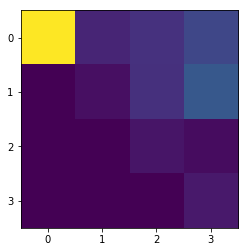

In [7]:
print(classification_report(y_teste, modelo.predict(X_novo_teste)))

plt.imshow(confusion_matrix(y_teste, modelo.predict(X_novo_teste)))
plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3])

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       359
           1       0.81      0.78      0.79       122
           2       0.67      0.10      0.17        20
           3       1.00      0.61      0.76        18

   micro avg       0.89      0.89      0.89       519
   macro avg       0.85      0.62      0.67       519
weighted avg       0.89      0.89      0.88       519

[0 0 1 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0
 0 2 0 0 0 0 2 1 1 1 0 1 0 0 1 0 0 0 1 0 0 3 1 0 0 0 0 0 0 0 0 0 3 2 1 0 0
 2 1 0 0 0 1 0 0 0 0 0 0 1 0 3 0 1 1 0 0 0 1 2 0 0 1 0 1 0 0 3 3 1 0 0 0 0
 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 2 0 0 0 0 0 0
 0 1 1 0 0 2 0 0 1 0 0 0 0 2 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 2 1 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 2 1 0 0 0 3 0 0 1 3 0 0 0 0 0 1
 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 3 0
 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0

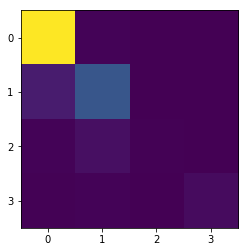

In [8]:
# --- KNN ---
X = np.array(df.copy().drop('avaliação', 1), dtype= 'int64')
y = np.array(df.copy()['avaliação'], dtype= 'int64')

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

modelo_knn = KNeighborsClassifier(n_neighbors=11).fit(X_treino, y_treino)
modelo_knn.predict(X_teste)

print(classification_report(y_teste, modelo_knn.predict(X_teste)))


plt.imshow(confusion_matrix(y_teste, modelo_knn.predict(X_teste)))
plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3])

print(y_teste)
print(modelo_knn.predict(X_teste))

Explique e discuta sobre os resultados encontrados no campo abaixo.

Na amostra de treino selecionei 70% do dataset e os outros 30% foram utilizados para o teste.

No algoritmo de Regressão Logística o desempenho da classificação não foi muito satisfatório. Já, no algoritmo kNN, a classificação foi boa, com algumas ressalvas. Fiquei um pouco confuso nos parâmetros a serem utilizados na função de regressão logística e, por fim, depois de testar vários, percebi que o método 'lbfgs' e o fit_intercept=False me retornavam resultados menos insatisfatórios.

Ambos os algoritmos se mostraram melhores na classificação dos carros como 'unnac' (classe 0) e 'acc' (classe 1), sendo que o kNN se mostrou mais preciso nesse caso, como pode ser visto pelos valores mais altos em precisão, revocação e F1 e pela matriz de confusão.

Pela matriz de confusão do método de regressão logística pode-se perceber que ocorrem muitos falso positivos de itens das classes 2 ou 3 sendo classificados como classe 0.

Por algum motivo, o KNN sofre em classificar corretamente instâncias como pertencentes à classe 2, talvez porque o dataset não deixe muito claro quando um item deve ser classificado nessa faixa ou porque faltam melhores exemplos para o algoritmo na fase de treino.

Por fim, acredito que nenhum dos dois modelos descreve maravilhosamente bem os dados e é capaz de classificá-los de forma ótima, porém o kNN com k=11 teve melhor desempenho.